In [1]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드 
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 코드 
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print("train set:", x_train.shape, y_train.shape)
print("test set:", x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train/x_train.max()
x_test = x_test/ x_test.max()

2024-05-21 09:55:33.986306: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


- ### 초기값 설정

: 레이어의 초기화 방법을 다르게 설정할 수 있다. 

케라스에서 지원하는 자주 사용되는 초기화 목록 <br>
: 글로럿 초기화 / Uann Lecun 초기화 / He 초기화/ 정규분포,연속균등 분포 초기화

In [2]:
dense = tf.keras.layers.Dense(256, activation="relu")
dense.get_config()["kernel_initializer"]

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

In [3]:
# 문자열 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer="he_normal", activation ="relu")
print(dense.get_config()["kernel_initializer"])

{'class_name': 'HeNormal', 'config': {'seed': None}}


In [4]:
# 클래스 인스터스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation="relu")
print(dense.get_config()["kernel_initializer"])

{'class_name': 'HeNormal', 'config': {'seed': None}}


- ### 규제(Regularization)

모델의 과대적합을 해소하기 위해 L1, L2 규제를 적용하기도 한다. 텐서플로 케라스 레이어는 기본값으로 규제를 적용하지 않고 있다. 따라서 레이어에 규제를 적용하기 위해서는 별도로 설정해주어야 한다.

In [5]:
# 기본값

dense = tf.keras.layers.Dense(256, activation="relu")
dense.get_config()

{'name': 'dense_3',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

-> 'kernel_regularizer' None으로 설정되어있음 

In [6]:
# L1 규제 적용

dense = tf.keras.layers.Dense(256, kernel_regularizer="l1", activation="relu")
print(dense.get_config()["kernel_regularizer"])

{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}


In [7]:
# 클래스 인스턴스 적용, alpha=0.1 변경

regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation="relu")
print(dense.get_config()["kernel_regularizer"])

{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


- ### 드롭아웃(Dropout)

딥러닝 모델의 가장 큰 난제가 바로 과대적합 문제다. 딥러닝 모델의 층이 넓고 깊어질 때 모델은 훈련에 주어진 샘플에 과하게 적합하도록 학습하는 경향이 있다. 따라서 훈련할 때 만나지 못한 새로운 데이터에 대해서는 좋지 않는 예측력을 보일 때가 많다. 즉, 훈련 데이터셋에 너무 적응하여 검증 데이터셋이나 테스트 데이터셋에 대해 일반화된 성능을 갖지 못하는 문제가 자주 발생하는 편이다. 드롭아웃은 모델의 과대적합 문제를 해결하기 위해 제안된 아이디어이며, 실무적으로 상당히 좋은 효과를 보이는 것으로 알려져 있다.

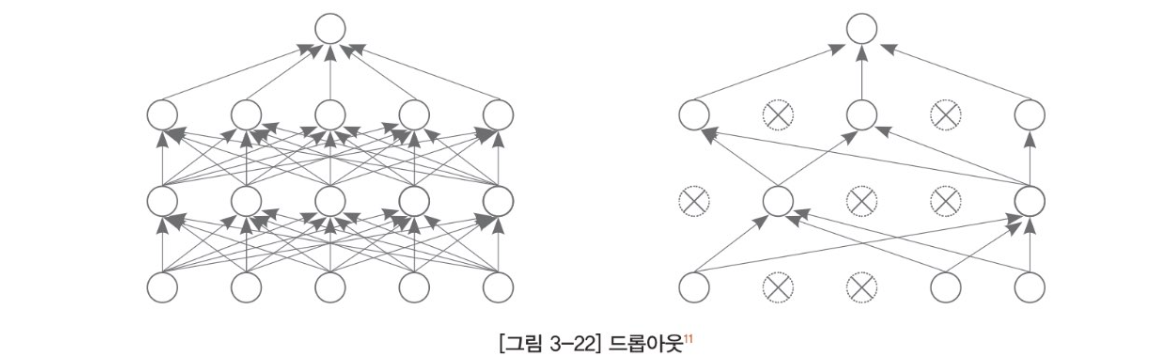

In [8]:
from IPython.display import Image
Image("/Users/ijiseon/Desktop/드롭아웃.png")

왼쪽 그림을 보면 모든 노드들이 연결되어 있다. 하지만 오른쪽 그림은 모든 노드가 연결되어 있지 않고 확률적으로 몇 개의 신호는 끊겨 있다. 이렇게 노드의 일부 신호를 임의로 삭제하게 되면, 모델이 쉽게 과대적합 되는 것을 방지할 수 있다. 모델이 학습하는 가중치 파라미터의 개수가 현저하게 줄어들게 되기 때문이다. 

중요한 점은 모델이 훈련할 때는 드롭아웃이 적용되어 노드 중 일부만 훈련하게 되지만, 예측 시점에는 모든 노드들이 활용된다. 

In [9]:
# Dropout 25% 비율 적용 (25%의 노드가 삭제)
tf.keras.layers.Dropout(0.25)

- ### 배치 정규화(Batch Normalization)

배치 정규화는 각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일을 정규화한다. 다음층으로 데이터가 전달되기 전에 스케일을 조정하기 때문에 보다 안정적인 훈련이 가능하고 성능을 크게 향상시킬 수 있다.

In [10]:
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation("relu"),
    
    tf.keras.layers.Dense(32),
     # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation("relu"),
    
    tf.keras.layers.Dense(10,activation="softmax")
    
])

model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_2 (Batc  (None, 32)               128       
 hNormalization)                                      

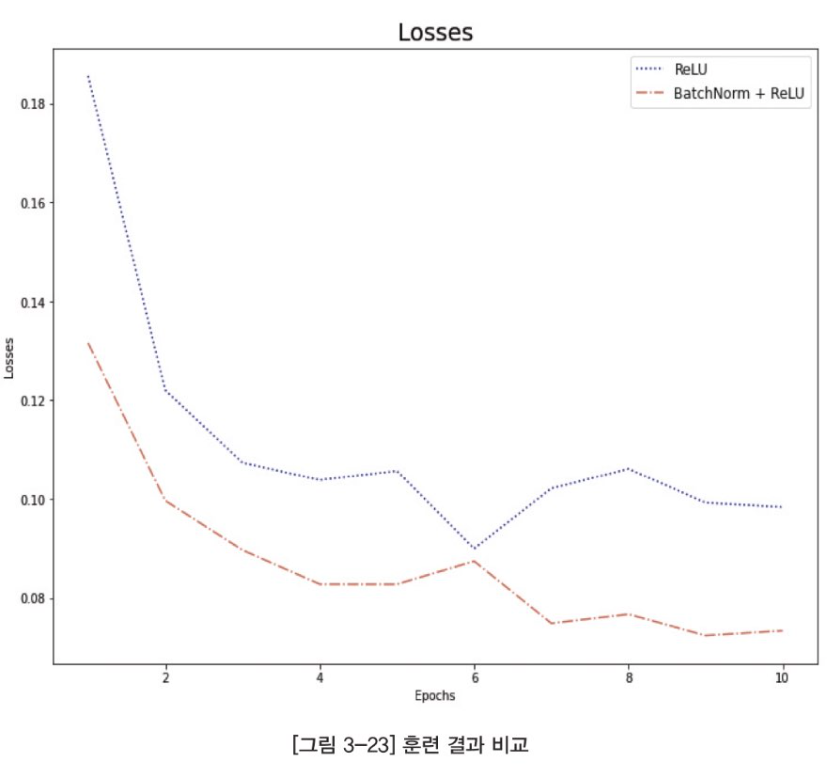

In [13]:
Image("/Users/ijiseon/Desktop/배치정규화.png")

-> 배치 정규화만 추가하였는데 손실은 이전 대비 더 안정적이고 빠르게 수렴 <br>
-> 더 크고 복잡한 데이터셋에 대해서는 배치 정규화 유무가 모델 성능에 크게 영향을 미치는 경우도 있으므로 배치 정규화를 적극 적용해 볼 필요가 있다

- ### 활성화(activation) 함수

In [14]:
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [16]:
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),
    
    tf.keras.layers.Dense(32),
     # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),
    
    tf.keras.layers.Dense(10,activation="softmax"),
    
])

model_c.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_4 (Batc  (None, 32)               128       
 hNormalization)                                      

앞에서 생성한 2개의 모델과 LeakyReLU 활성화 함수로 변경한 모델까지 더해서 총 3개의 모델을 동일한 조건으로 10번의 에포크 동안 훈련한 후에 수렴 속도를 확인한다

- model_a : Dense레이어 + ReLU 활성화함수

- model_b :  Dense레이어 + 배치 정규화

- model_c : Dense레이어 + 배치 정규화 + LeakyReLU(0.2) 활성화함수

In [18]:
model_a.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model_b.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model_c.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history_a = model_a.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=10)
history_b = model_b.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=10)
history_c = model_c.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2852 - accuracy: 0.9164 - val_loss: 0.1682 - val_accuracy: 0.9501
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1361 - accuracy: 0.9586 - val_loss: 0.1297 - val_accuracy: 0.9623
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0987 - accuracy: 0.9700 - val_loss: 0.1114 - val_accuracy: 0.9662
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0763 - accuracy: 0.9762 - val_loss: 0.1002 - val_accuracy: 0.9706
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0638 - accuracy: 0.9801 - val_loss: 0.0984 - val_accuracy: 0.9709
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0525 - accuracy: 0.9831 - val_loss: 0.0909 - val_accuracy: 0.9738
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0453 - accuracy: 0.9854 - val_loss: 0.0894 - val_accuracy:

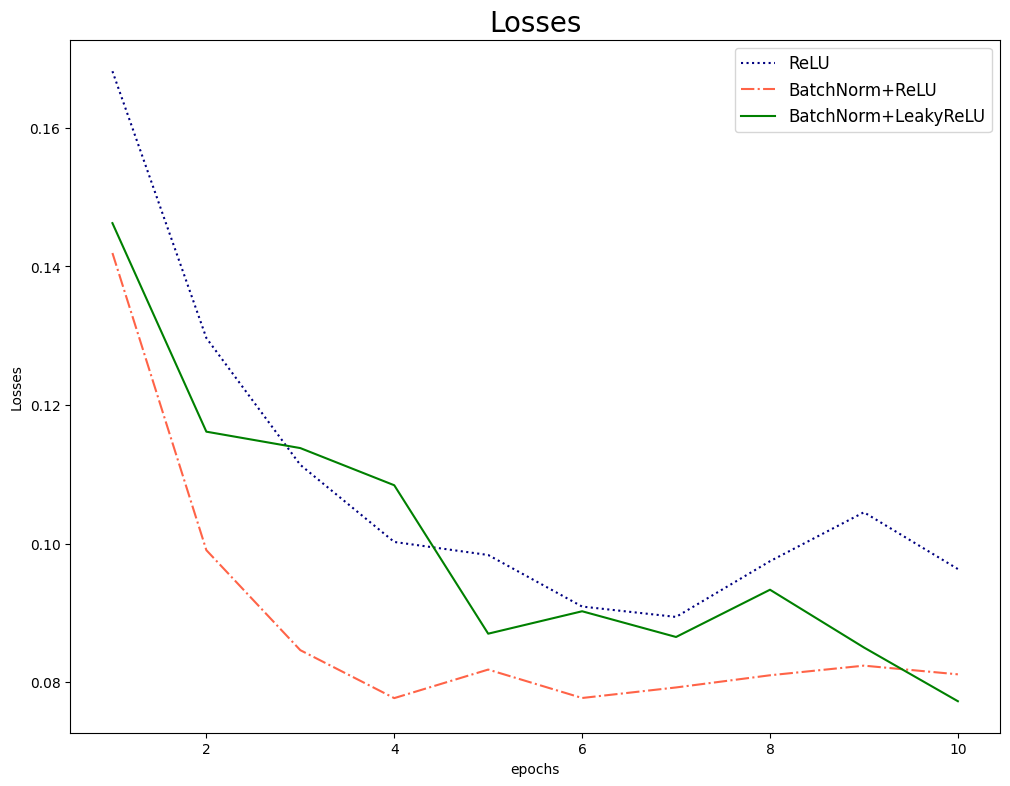

In [21]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,9))
plt.plot(np.arange(1,11), history_a.history["val_loss"],color="navy",linestyle=":")
plt.plot(np.arange(1,11), history_b.history["val_loss"],color="tomato",linestyle="-.")
plt.plot(np.arange(1,11), history_c.history["val_loss"],color="green",linestyle="-")

plt.title("Losses",fontsize=20)
plt.xlabel("epochs")
plt.ylabel("Losses")
plt.legend(["ReLU","BatchNorm+ReLU","BatchNorm+LeakyReLU"],fontsize=12)

> 모델을 파일로 저장

In [23]:
model_c.save("h5-model.h5")

In [24]:
h5_model = tf.keras.models.load_model("h5-model.h5")

In [25]:
h5_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_4 (Batc  (None, 32)               128       
 hNormalization)                                      

In [28]:
loss,acc = h5_model.evaluate(x_test,y_test,verbose=0)
print(f"h5model] loss:{loss:.5f}.acc:{acc:.5f}")

h5model] loss:0.07725.acc:0.97770


In [29]:
model_c.save("saved-model")

INFO:tensorflow:Assets written to: saved-model/assets


INFO:tensorflow:Assets written to: saved-model/assets


In [30]:
saved_model = tf.keras.models.load_model("saved-model")
saved_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_4 (Batc  (None, 32)               128       
 hNormalization)                                      

In [31]:
loss,acc = h5_model.evaluate(x_test,y_test,verbose=0)
print(f"h5model] loss:{loss:.5f}.acc:{acc:.5f}")

loss,acc = saved_model.evaluate(x_test,y_test,verbose=0)
print(f"saved_model] loss:{loss:.5f}.acc:{acc:.5f}")

h5model] loss:0.07725.acc:0.97770
saved_model] loss:0.07725.acc:0.97770


> ## 복잡한 모델 생성 

- ### 함수형 API (Functional API) <br>
: 함수 형태로 딥러닝 모델을 정의하면 다양한 모델 구조를 구현할 수 있다. <br>
ex1) 함수의 입력 매개변수를 여러 개 갖는 다중 입력 <br>
ex2) 함수의 return 값을 여러 개 갖는 다중 출력  <br>
ex3) 같은 레벨에 여러 개의 층을 배치하여 입력과 출력을 공유하는 구조 

     한편, Sequential API를 사용하는 경우 단방향의 Sequential 모델만 구현할 수 있다는 제약이 있다. 데이터 흐름이 특정 레잉어를 건너뛰거나, 병합 및 분리하는 등의 구조의 모델을 구현할 수는 없다. 

함수형 API를 사용하기 위해서는 먼저 Input 레이어를 정의한다. Input레이어에 데이터의 입력 shape을 정의한다. 레이어마다 반환되는 출력 값을 변수에 저장한 뒤 다음 레이어의 입력으로 연결한다. 이렇게 여러 개의 레이어를 마치 체인 구조로 입출력을 계속 연결할 수 있다. 

In [33]:
input_layer = tf.keras.Input(shape=(28,28), name="InputLayer")

x1 = tf.keras.layers.Flatten(name="Flatten")(input_layer)
x2 = tf.keras.layers.Dense(256,activation="relu",name="Dense1")(x1)
x3 = tf.keras.layers.Dense(64,activation="relu",name="Dense2")(x2)
x4 = tf.keras.layers.Dense(10,activation="softmax",name="OutputLayer")(x3)

In [34]:
func_model = tf.keras.Model(inputs=input_layer, outputs=x4, name="FunctionalModel")

func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [46]:
from tensorflow.keras.utils import plot_model

plot_model(func_model, show_shapes=True, show_layer_names=True, to_file="model.png")

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


-> 설치했는데도 실행 안됨 

In [48]:
func_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

func_model.fit(x_train,y_train, epochs=3)

loss, acc = func_model.evaluate(x_test,y_test,verbose=0)
print(f"func_model] loss:{loss:.5f}.acc:{acc:.5f}")

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2206 - accuracy: 0.9349
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0888 - accuracy: 0.9726
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0615 - accuracy: 0.9807
func_model] loss:0.06993.acc:0.97780


- ### 모델 서브 클래싱 

In [53]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel,self).__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(256,activation="relu")
        self.dense2 = tf.keras.layers.Dense(64,activation="relu")
        self.dense3 = tf.keras.layers.Dense(10,activation="softmax")
        
    # method overiding
    # 훈련용 함수 정의
    # x는 input
    def call(self,x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [54]:
# 모델 생성
mymodel = MyModel()
# 모델의 이름 설정
mymodel._name = "subclass_model"
# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))
# 모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         multiple                  0         
                                                                 
 dense_19 (Dense)            multiple                  200960    
                                                                 
 dense_20 (Dense)            multiple                  16448     
                                                                 
 dense_21 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [55]:
mymodel.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

mymodel.fit(x_train,y_train, epochs=3)

loss, acc = mymodel.evaluate(x_test,y_test,verbose=0)
print(f"Subclassing Model]loss:{loss:.5f}.acc:{acc:.5f}")

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2147 - accuracy: 0.9364
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0885 - accuracy: 0.9728
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0607 - accuracy: 0.9806
Subclassing Model]loss:0.08525.acc:0.97320


In [56]:
class MyModel(tf.keras.Model):
    
    # 생성자 파라미터 추가  
    def __init__(self, units, num_classes):
        super(MyModel,self).__init__()
        #초기값 설정 
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units,activation="relu")
        self.dense2 = tf.keras.layers.Dense(units/4,activation="relu")
        self.dense3 = tf.keras.layers.Dense(num_classes,activation="softmax")
        
    # class overiding
    # 훈련용 함수 정의
    # x는 input
    def call(self,x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [57]:
# 모델 생성
mymodel = MyModel(256,10)

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))

# 모델 요약
mymodel.summary()

Model: "my_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         multiple                  0         
                                                                 
 dense_22 (Dense)            multiple                  200960    
                                                                 
 dense_23 (Dense)            multiple                  16448     
                                                                 
 dense_24 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [58]:
mymodel.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

mymodel.fit(x_train,y_train, epochs=3)

loss, acc = mymodel.evaluate(x_test,y_test,verbose=0)
print(f"Subclassing Model w.parameters]loss:{loss:.5f}.acc:{acc:.5f}")

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2164 - accuracy: 0.9366
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0868 - accuracy: 0.9731
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0604 - accuracy: 0.9810
Subclassing Model w.parameters]loss:0.08025.acc:0.97660
